In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = faces.images.shape
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


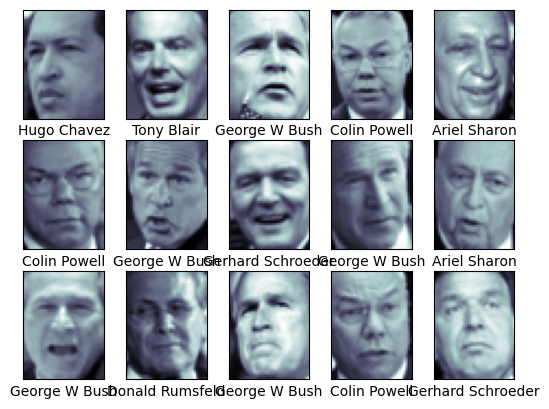

In [8]:
# 7명의 사진
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

In [9]:
X = faces.data
n_features = X.shape[1]
y = faces.target

In [12]:
print(X)

[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


In [13]:
print(n_features)

1850


In [14]:
print(y)

[5 6 3 ... 5 3 5]


In [15]:
target_names = faces.target_names
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [16]:
n_classes = target_names.shape[0]
print(n_classes)

7


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'C':[1e3, 5e3, 1e4, 5e4, 1e5],
             'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)
clf.fit(X_train_pca, y_train)
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.005}
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [22]:
y_fit = clf.predict(X_test_pca)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_fit, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.38      0.50        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.81      0.98      0.89       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       0.88      0.47      0.61        15
       Tony Blair       1.00      0.78      0.88        36

         accuracy                           0.84       322
        macro avg       0.87      0.70      0.76       322
     weighted avg       0.85      0.84      0.84       322



In [25]:
print(confusion_matrix(y_test, y_fit, labels=range(n_classes)))

[[  5   2   0   6   0   0   0]
 [  2  52   0   5   0   1   0]
 [  0   2  17   8   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   4  20   0   0]
 [  0   3   0   4   1   7   0]
 [  0   1   1   6   0   0  28]]
